# Abgabe 6

100%|██████████| 170498071/170498071 [00:14<00:00, 11945979.76it/s]


Extracting data\cifar-10-python.tar.gz to data
Files already downloaded and verified


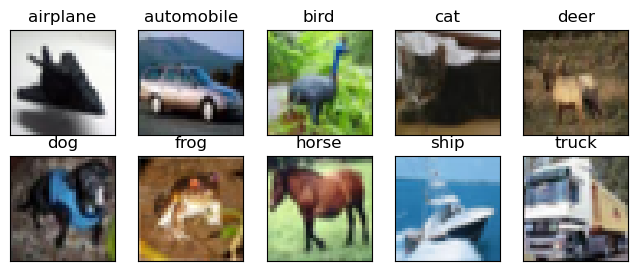

Normalize(mean=(0.4915, 0.4823, 0.4468), std=(0.247, 0.2435, 0.2616))

In [1]:
# Aufgabe 1

from matplotlib import pyplot as plt
import numpy as np
import torch

torch.set_printoptions(edgeitems=2)
torch.manual_seed(123)


from torchvision import datasets


cifar10 = datasets.CIFAR10('data', train=True, download=True)
cifar10_val = datasets.CIFAR10('data', train=False, download=True)

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(8,3))
num_classes = 10


for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    img = next(img for img, label in cifar10 if label == i) 
    plt.imshow(img)
plt.show()


from torchvision import transforms
cifar10 = datasets.CIFAR10('data', train=True, download=False,
                          transform=transforms.ToTensor())

img, _ = cifar10[99]

imgs = torch.stack([img for img, _ in cifar10], dim=3)

imgs.view(3, -1).mean(dim=1)
imgs.view(3, -1).std(dim=1)

transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))

In [2]:
from torchvision import datasets
from torchvision import transforms

cifar10 = datasets.CIFAR10('data', train=True, download=False,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))

cifar10_val = datasets.CIFAR10('data', train=False, download=False,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))

label_map = {0: 0, 2: 1}
cifar2 = [(img, label_map[label]) for img, label in cifar10 if label in [0, 2]] 
cifar2_val = [(img, label_map[label]) for img, label in cifar10_val if label in [0, 2]]

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim

# NLLLoss
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 128),
            nn.Tanh(),
            nn.Linear(128, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

loss_NLL = []
epoch_NLL = []
for epoch in range(n_epochs):
    
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))
    loss_NLL.append(loss) 
    epoch_NLL.append(epoch)

Epoch: 0, Loss: 0.552094
Epoch: 1, Loss: 0.484176
Epoch: 2, Loss: 0.557825
Epoch: 3, Loss: 0.554888
Epoch: 4, Loss: 0.570663
Epoch: 5, Loss: 0.350973
Epoch: 6, Loss: 0.591266
Epoch: 7, Loss: 0.548075
Epoch: 8, Loss: 0.190939
Epoch: 9, Loss: 0.437478
Epoch: 10, Loss: 0.350288
Epoch: 11, Loss: 0.243390
Epoch: 12, Loss: 0.190494
Epoch: 13, Loss: 0.358921
Epoch: 14, Loss: 0.516139
Epoch: 15, Loss: 0.274657
Epoch: 16, Loss: 0.386394
Epoch: 17, Loss: 0.116322
Epoch: 18, Loss: 0.338291
Epoch: 19, Loss: 0.239839
Epoch: 20, Loss: 0.518006
Epoch: 21, Loss: 0.167759
Epoch: 22, Loss: 0.298613
Epoch: 23, Loss: 0.279513
Epoch: 24, Loss: 0.182074
Epoch: 25, Loss: 0.294607
Epoch: 26, Loss: 0.412752
Epoch: 27, Loss: 0.219163
Epoch: 28, Loss: 0.151529
Epoch: 29, Loss: 0.112381
Epoch: 30, Loss: 0.297842
Epoch: 31, Loss: 0.374713
Epoch: 32, Loss: 0.309709
Epoch: 33, Loss: 0.250677
Epoch: 34, Loss: 0.306587
Epoch: 35, Loss: 0.145437
Epoch: 36, Loss: 0.209056
Epoch: 37, Loss: 0.257786
Epoch: 38, Loss: 0.323

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim

# MSELoss
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 128),
            nn.Tanh(),
            nn.Linear(128, 1),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.MSELoss()

n_epochs = 100

loss_MSE = []
epoch_MSE = []
for epoch in range(n_epochs):
    
    for imgs, labels in train_loader:
        labels = labels.float()
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss2 = loss_fn(outputs,labels.view(-1, 1))
        
        optimizer.zero_grad()
        loss2.backward()
        
        optimizer.step()
        
    
    print("Epoch: %d, Loss: %f" % (epoch, float(loss2)))
    loss_MSE.append(loss2) 
    epoch_MSE.append(epoch)
   

Epoch: 0, Loss: 0.375000
Epoch: 1, Loss: 0.375000
Epoch: 2, Loss: 0.750000
Epoch: 3, Loss: 0.562500
Epoch: 4, Loss: 0.625000
Epoch: 5, Loss: 0.312500
Epoch: 6, Loss: 0.625000
Epoch: 7, Loss: 0.500000
Epoch: 8, Loss: 0.437500
Epoch: 9, Loss: 0.562500
Epoch: 10, Loss: 0.375000
Epoch: 11, Loss: 0.687500
Epoch: 12, Loss: 0.500000
Epoch: 13, Loss: 0.437500
Epoch: 14, Loss: 0.687500
Epoch: 15, Loss: 0.625000
Epoch: 16, Loss: 0.687500
Epoch: 17, Loss: 0.687500
Epoch: 18, Loss: 0.437500
Epoch: 19, Loss: 0.625000
Epoch: 20, Loss: 0.750000
Epoch: 21, Loss: 0.500000
Epoch: 22, Loss: 0.500000
Epoch: 23, Loss: 0.562500
Epoch: 24, Loss: 0.562500
Epoch: 25, Loss: 0.687500
Epoch: 26, Loss: 0.500000
Epoch: 27, Loss: 0.500000
Epoch: 28, Loss: 0.687500
Epoch: 29, Loss: 0.500000
Epoch: 30, Loss: 0.500000
Epoch: 31, Loss: 0.562500
Epoch: 32, Loss: 0.687500
Epoch: 33, Loss: 0.750000
Epoch: 34, Loss: 0.562500
Epoch: 35, Loss: 0.312500
Epoch: 36, Loss: 0.375000
Epoch: 37, Loss: 0.687500
Epoch: 38, Loss: 0.687

Text(0.5, 1.0, 'Comparision between NLL and MSE loss function')

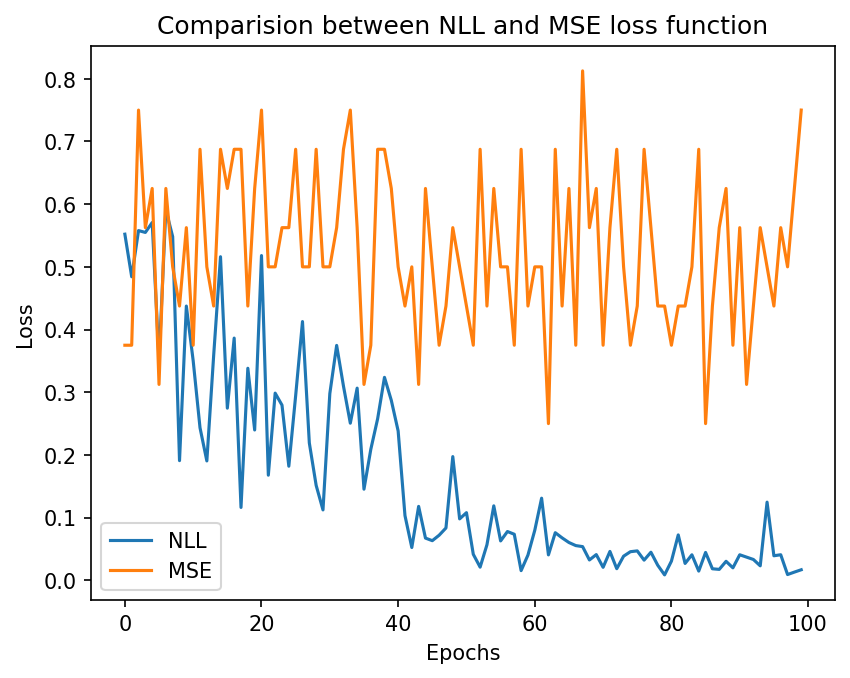

In [5]:
epoch_NLL = torch.Tensor(epoch_NLL)
epoch_MSE = torch.Tensor(epoch_MSE)
loss_NLL = torch.Tensor(loss_NLL)
loss_MSE = torch.Tensor(loss_MSE)
fig = plt.figure(dpi=150)
plt.plot(epoch_NLL, loss_NLL, label='NLL')
plt.plot(epoch_MSE, loss_MSE, label='MSE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Comparision between NLL and MSE loss function")

Text(0.5, 1.0, 'Comparision between NLL and MSE loss function (smaller Network)')

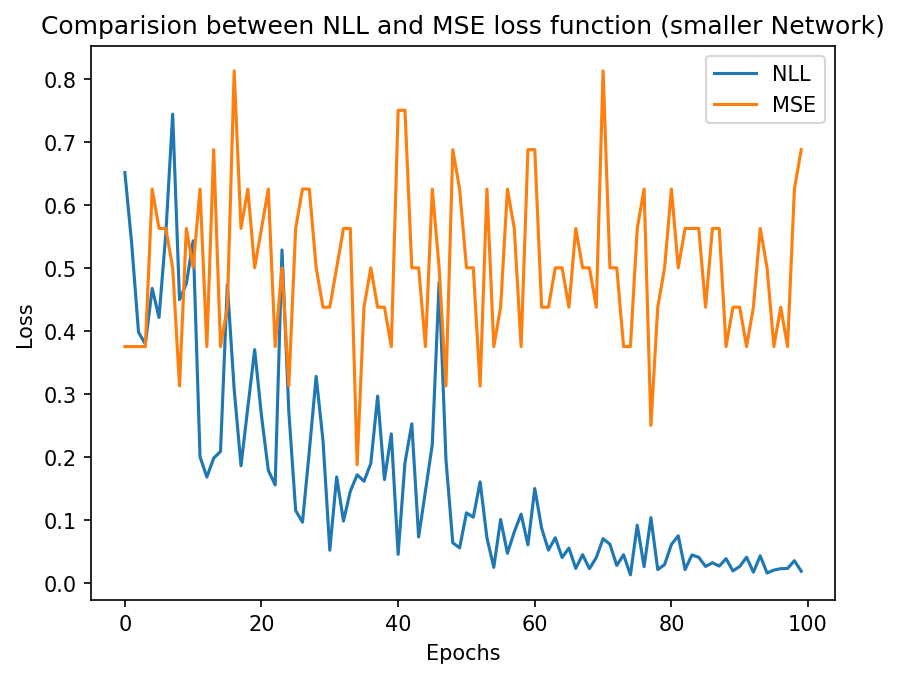

In [8]:
# Aufgabe 2

# NLLLoss
import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 90),
            nn.Tanh(),
            nn.Linear(90, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

loss_NLL_2 = []
epoch_NLL_2 = []
for epoch in range(n_epochs):
    
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    #print("Epoch: %d, Loss: %f" % (epoch, float(loss)))
    loss_NLL_2.append(loss) 
    epoch_NLL_2.append(epoch)

# MSELoss
import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 90),
            nn.Tanh(),
            nn.Linear(90, 1),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.MSELoss()

n_epochs = 100

loss_MSE_2 = []
epoch_MSE_2 = []
for epoch in range(n_epochs):
    
    for imgs, labels in train_loader:
        labels = labels.float()
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss2 = loss_fn(outputs,labels.view(-1, 1))
        
        optimizer.zero_grad()
        loss2.backward()
        
        optimizer.step()
        
    
    #print("Epoch: %d, Loss: %f" % (epoch, float(loss2)))
    loss_MSE_2.append(loss2) 
    epoch_MSE_2.append(epoch)
   
epoch_NLL_2 = torch.Tensor(epoch_NLL_2)
epoch_MSE_2 = torch.Tensor(epoch_MSE_2)
loss_NLL_2 = torch.Tensor(loss_NLL_2)
loss_MSE_2 = torch.Tensor(loss_MSE_2)
fig = plt.figure(dpi=150)
plt.plot(epoch_NLL_2, loss_NLL_2, label='NLL')
plt.plot(epoch_MSE_2, loss_MSE_2, label='MSE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Comparision between NLL and MSE loss function (smaller Network)")